# Comparaison d’´echantillons et tests multiples -- Code R


## 3 - Test non paramétrique 

### 3 - a)

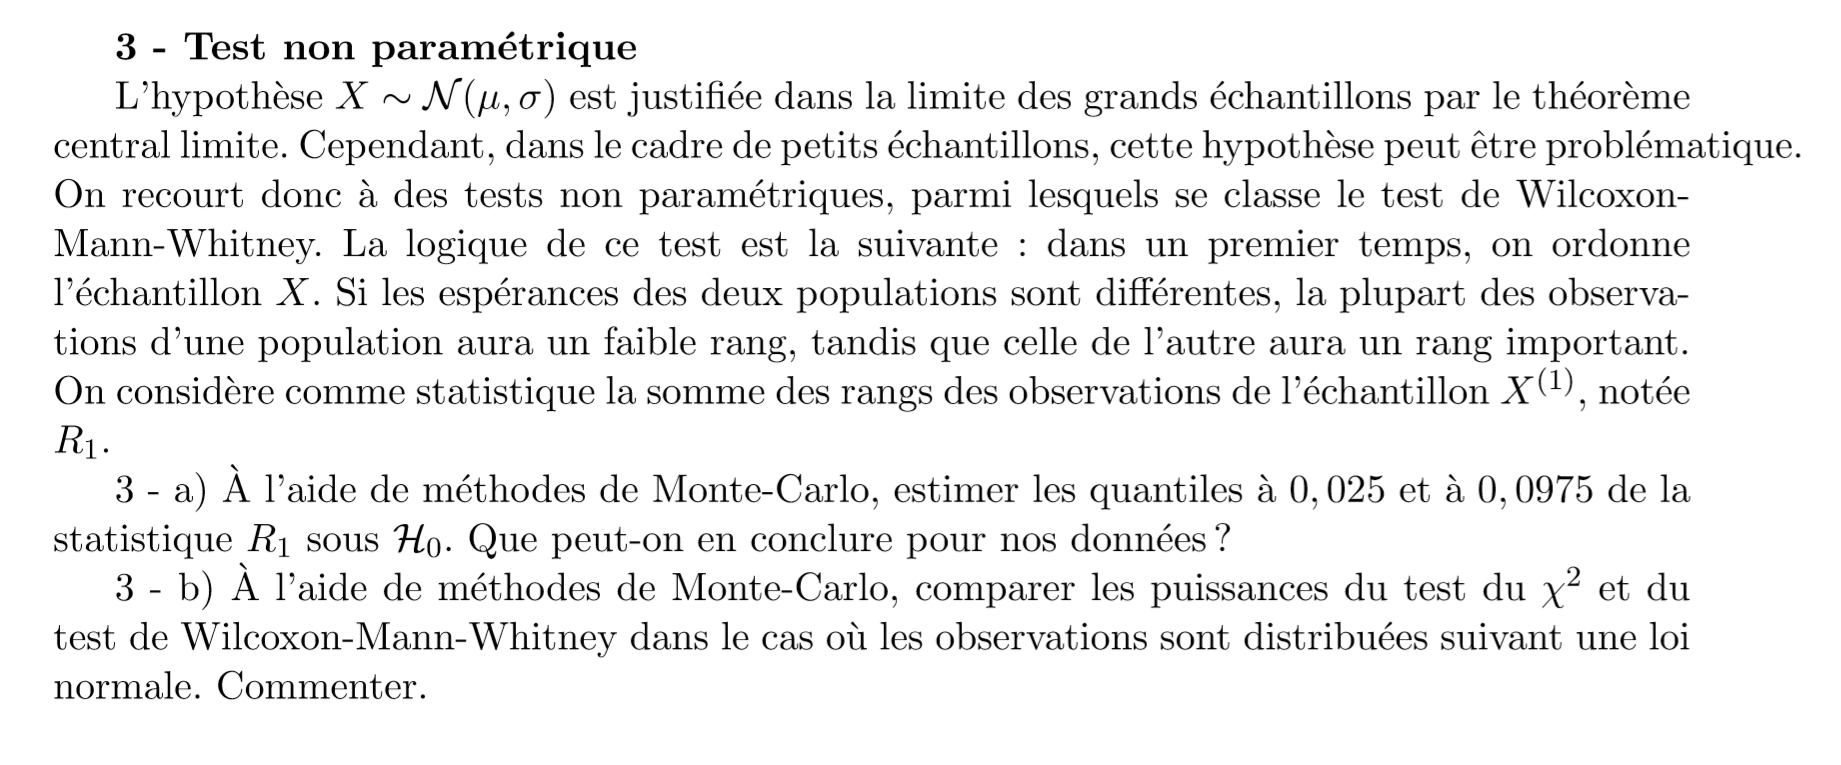

## Aide -- Ancien code à moi qui peut nous être utile 


In [7]:
##Partie 1

ft1 <-function(x,y) {  #f tilde 1
  return(exp(-1/2*((x^2)/4+y^2))*(abs(y)<=1))
} 

ft2 <- function(x,y) {  #f tilde 2
  return( ((cos(x)^2)+0.5*(sin(3*y)^2)*(cos(x)^4))*exp(-1/2*((x^2)/4+y^2)) )
}

M1<-4*pi      #Les constantes utilisees pour l'algorithme de rejet
M2<-1.5*M1

g<- function(x,y){ #Le g qu'on utilise dans l'algorithme de rejet pour f1 et f2
  return( 1/(4*pi)*exp((-1/2)*(x^2/4+y^2)) ) #Equivalent : dnorm(x,0,2)*dnorm(y,0,1)
}

Mu1<-4*sqrt(2*pi)
gu<- function(x,y){
  return( 1/(4*sqrt(2*pi))*exp((-1/2)*(x^2/4))*(abs(y)<1) )
}
c1 <- 1/(4*pi*(pnorm(1)-pnorm(-1))) #Constante de normalisation : f1=c1*ft1

f1<-function(x,y){
  return(c1*ft1(x,y))
}

dmarginale2f1<- function(x){ #La marginale de f1 selon la deuxieme variable
  return(exp(-1/2*(x^2))/(sqrt(2*pi)*(pnorm(1)-pnorm(-1)))*(abs(x)<=1))
}

##Partie 2

h1<- function(x,y) {    # fonction dont on cherche l'esperence par 
  return(((exp(x)+exp(y))>=5)*1)
}

h2 <- function(x,y) {   # fonction dont on cherche l'esperence deuxieme cas 
  return( cos(x*y)*sin(x)*exp(sin(x+y)) ) }


##Partie3

dmarginale2fR<- function(x,M){ 
  #La marginale des variables rejetees selon la deuxieme variable (Z2) pour normale 
  return((M*dnorm(x,0,1)-dmarginale2f1(x))/(M-1))
}


dmarginale2fRu<- function(x,M){ 
#La marginale des variables rejetees selon la deuxieme variable
  return((M*dunif(x,-1,1)-dmarginale2f1(x))/(M-1))
}

c3<-1/(4*pi*(pnorm(1)-pnorm(-1)+0.5)) 

f3 <-function(x,y) {  #f tilde 3 fois sa constante de normalisation
  return(c3*exp(-1/2*((x^2)/4+y^2))*((abs(y)<=1)+0.5))
} 



##Partie4

alphaMH <- function(f,g,x1,x2,y1,y2){
  return(min(1,(f(y1,y2)*g(x1,x2))/(f(x1,x2)*g(y1,y2))))
}

##General

estimVar <- function(x) { #Variance empirique
  return(mean(x^2)-(mean(x)^2))
}

estimVar1 <- function(x) { #Nous donne un vecteur pour voir l'evolution de la variance empirique
  return((x-cumsum(x)/1:n)^2)
}

IC <- function(n,x,s) { #Intervale de confiance de niveau s
  return( c(mean(x)-estimVar(x)/sqrt(n)*qnorm(s),mean(x)+estimVar(x)/sqrt(n)*qnorm(s)))
}

evolE<- function(x){              ##evolution de l'estimateur 
  return(cumsum(x)/(1:length(x)))
}

evolIC <- function(x, delta, level) {  ## x<-echantillon de l'estimateur et delta=evolution de l'estimateur
  n <- length(x)
  s2 <- (cumsum(x^2) - (1:n) * (delta)^2)/(0:(n - 1)) 
  IC <- qnorm(0.5 * (level + 1)) * sqrt(s2/(1:n))     ##calcul de q* racindeVar 
  return(data.frame(var = s2, born_inf_IC = delta - IC,born_sup_IC = delta + IC))
}

,value,var,born_inf_IC,born_sup_IC
10000,0.2546,0.1897978,0.2460613,0.2631387


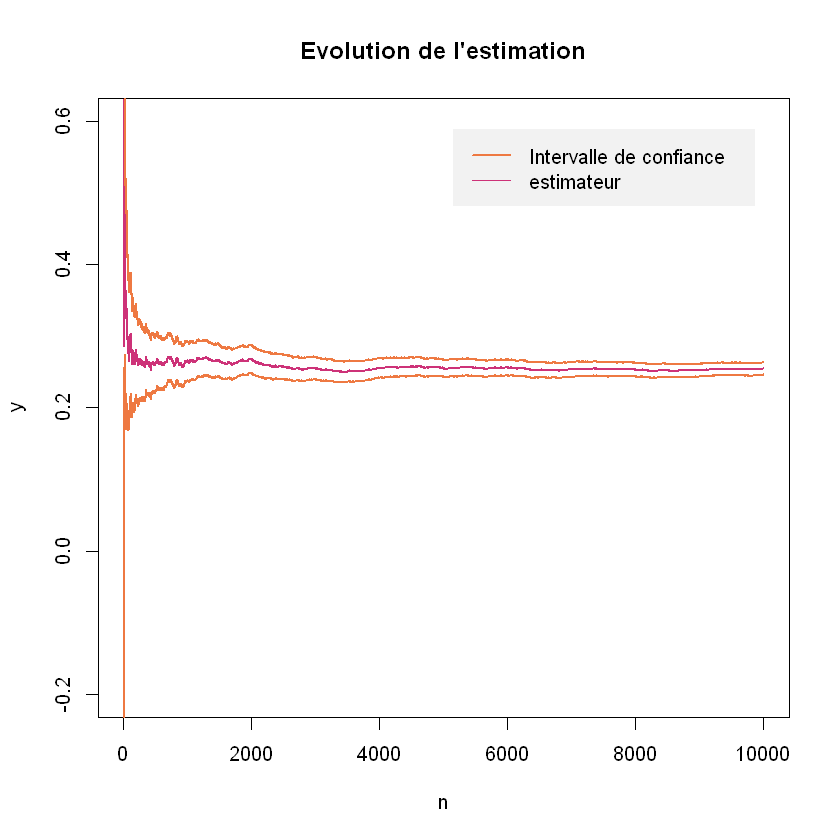

In [6]:
n<-10000
lev<-0.95 ##niveau de l'intervalle de confiance
x<-rejet_g(n,M1,ft1) ## on applique l'algorithme de rejet pour recuperer des echantillons suivant la loi de f1


## fonction qui retourne les caracteristiques de l'estimateur + graphe
MC <- function(y,lev) {   ##Methode de monte carlo classique
  a<-evolE(y)        ## on recupere l'evolution de l'estimateur
  b<-evolIC(y,a,lev) ## on recupere l'evolution de l'intervalle de confiance
  n<-length(y)
  par(mfrow=c(1,1))
  plot(1:n, a, type = "l", lwd = 2, col = "violetred3",main = "Evolution de l'estimation", ylim = c(-0.2,0.6), xlab = "n",ylab="y")
  lines(2:n, b$born_inf_IC[-1], col = "sienna2", lwd = 2)
  lines(2:n, b$born_sup_IC[-1], col = "sienna2", lwd = 2)
  legend("topright", c("Intervalle de confiance", "estimateur"), lwd = c(2, 1),
         col = c("sienna2", "violetred3"), inset = 0.05, bg = "gray95",
         box.lty = 0)
  return(data.frame(value=a[n],b[n,]))
}


## la fonction "transfo" permet de d'avoir des simulations de h(X1,X2) ou (X1,X2) a pour densite f1
transfo<- function(x,h){   ## on applique la fonction h sur 2 vecteurs
  return(h(x[,1],x[,2]))  ## on applique la fonction h a des vecteurs 
}

h1<- function(x,y) {    ## fonction dont on va chercher a estimer l'esperence
  return(((exp(x)+exp(y))>=5)*1)
}

y0<-transfo(x,h1)
MC(y0,lev)
